In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import LabelEncoder

f = open("train.txt",'r')

label=[]
phrase=[]
lines = f.readlines()
for l in lines:
    label.append(l[:5])
    phrase.append(l[5:])
    
labelSet=set(label)
df = pd.DataFrame(list(zip(label, phrase)), columns =['label', 'doc']) 

stopwords = set(stopwords.words('english'))

def clean_phrase(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

df["doc"]=cleaned_lines = df["doc"].apply(lambda x: clean_phrase(x))

X=df["doc"]

y=df["label"].tolist()
le = LabelEncoder()
le.fit(df.label.unique())

langue = le.classes_
langue_encoder = [(langue[i],i) for i in range(len(langue))]
print(langue_encoder)
new_y=le.fit_transform(y)



[('(ARA)', 0), ('(CHI)', 1), ('(FRE)', 2), ('(GER)', 3), ('(HIN)', 4), ('(ITA)', 5), ('(JPN)', 6), ('(KOR)', 7), ('(SPA)', 8), ('(TEL)', 9), ('(TUR)', 10)]


In [2]:
print(X.shape, new_y.shape)

(9900,) (9900,)


## Modele générale 

In [5]:
print(new_y)

[ 3 10  1 ...  8  4  1]


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, new_y, random_state=4)

tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

lr = LogisticRegression()
tfidf_lr = lr.fit(tf_train, y_train)

tfidf_test_predictions = tfidf_lr.predict(tf_test)

c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

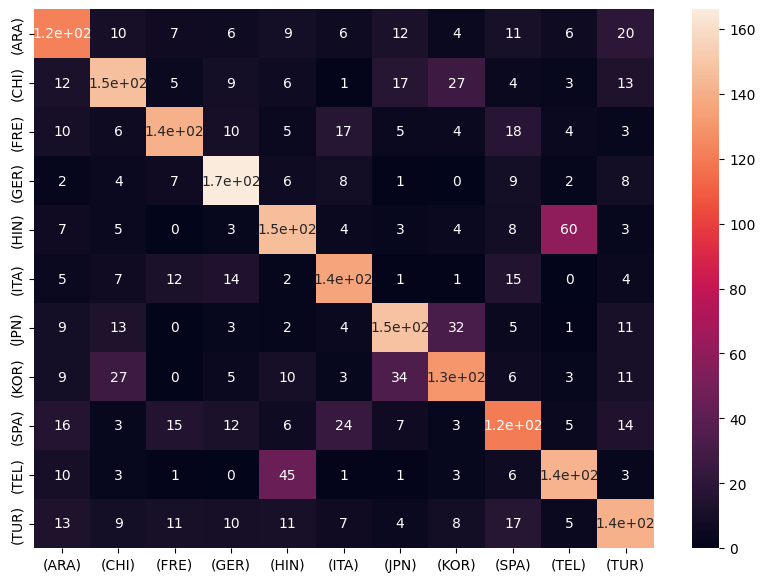

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

C2 = confusion_matrix(y_test,tfidf_test_predictions)

df_cm = pd.DataFrame(C2, index=list(langue), columns=list(langue))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### construire un testset sans data TEL et HIN

In [35]:
new_X_test=[]
new_y_test=[]

In [36]:
for i in range(len(y_test)):
    if y_test[i] not in [9,4]:
        new_y_test.append(y_test[i])
        new_X_test.append(X_test.iloc[i])

new_Tf_test = tf.transform(new_X_test)  

In [37]:
new_tfidf_test_predictions = tfidf_lr.predict(new_Tf_test)

In [38]:
len(new_X_test)

2017

In [39]:
len(new_y_test)

2017

<AxesSubplot: >

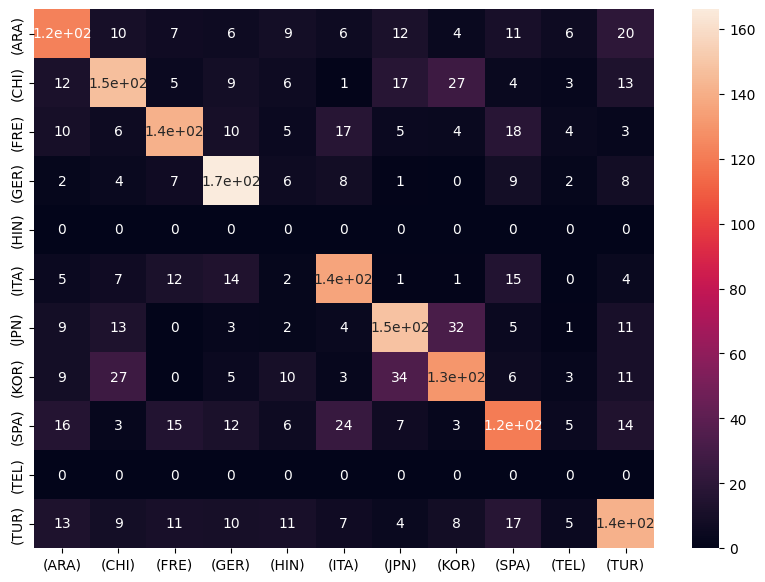

In [40]:
C2 = confusion_matrix(new_y_test,new_tfidf_test_predictions)

df_cm = pd.DataFrame(C2, index=list(langue), columns=list(langue))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [42]:
c = sum(x != y and x == 4 for x, y in zip(new_y_test, new_tfidf_test_predictions))

In [50]:
test = sum(x==9 for x in new_y)
test

900

In [43]:
print(c)

0


In [45]:
c=0
for i in range(len(y_test)):
    if y_test[i]!= tfidf_test_predictions[i] and y_test[i] == 9:
        c+=1 
print(c)

73


In [44]:
c=0
for i in range(len(y_test)):
    if y_test[i] == 4 and tfidf_test_predictions[i] != 4:
        c+=1 
print(c)

97


## 1ER modele classification